<a href="https://colab.research.google.com/github/TranThiDieuHien/Cac-thuat-toan-toi-uu/blob/main/Bai_tap_Linear_Regression_USAHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mô Tả Bài Toán

Bạn của bạn là một đại lý bán nhà và muốn bạn giúp họ dự đoán giá nhà.Họ mong muốn rằng bạn sẽ tạo ra một mô hình cho họ để cho phép họ có thể đưa vào một vài đặc điểm của một nhà và trả về ước tính giá trị của nhà đó sẽ được bán với giá là bao nhiêu.

### Dữ liệu chứa các cột sau: <br>


<li> 'Avg. Area Income':Thu nhập trung bình của người dân ở thành phố đó  </li>
<li> 'Avg. Area House Age': Tuổi trung bình của các ngôi nhà trong cùng một thành phố  </li>
<li> 'Avg. Area Number of Rooms': Số phòng trung bình của những ngôi nhà trong thành phố đó  </li>
<li> 'Avg. Area Number of Bedrooms': Số phòng ngủ trung bình của những ngôi nhà trong thành phố đó </li>
<li> 'Area Population'': Dân số của khu vực thành phố đó </li>
<li> 'Price': Giá trị mà ngôi nhà được bán lại </li>
<li> 'Address': Địa chỉ của ngôi nhà </li>

### Khai báo thư viện

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Đọc file data.csv

In [18]:
USAHousing = pd.read_csv("USA_Housing.csv")
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [19]:
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [20]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Training a Linear Regression Model

Bắt đầu đào tạo một mô hình hồi quy. Đầu tiên, ta sẽ chia dữ liệu USA_Housing thành một mảng X chứa các yếu tố cần training và một mảng y có chứa biến mục tiêu cần hướng tới. Trong trường hợp này là cột Price. Ta sẽ loại bỏ cột Address vì nó chứa thông tin văn bản mà mô hình hồi quy tuyến tính không thể sử dụng.

In [21]:
X = USAHousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAHousing['Price']

#### Chia dữ liệu thành tập train và tập test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4227,66547.016454,5.846095,6.847298,4.13,27850.822901
4676,53722.008599,6.401391,7.787764,3.30,47649.224665
800,64838.492899,6.437157,8.699544,4.02,32921.010068
3671,67097.092120,6.086754,7.211963,3.05,27191.506877
4193,75245.465436,8.167820,7.420100,3.42,37410.669928


## Khởi tạo Model Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
predictions = lm.predict(X_test)

In [28]:
predictions

array([1308587.92699759, 1237037.22949434, 1243429.34030681,
       1228900.2136037 , 1063320.9071083 , 1544058.05034861,
       1094774.70493019,  833284.72339225,  788412.85578719,
       1469714.86615709,  671728.43662062, 1606818.2197796 ,
       1004166.61331065, 1796798.9759592 , 1288566.96221026,
       1087782.93301076, 1423072.37492533, 1078178.68169677,
        802286.03537898,  930761.03695709, 1134829.86477822,
        916398.42023144, 1489972.69335433, 1284580.15538816,
       1582071.35322737, 1132519.15991992, 1089888.39644517,
        974510.51872155,  924057.96820648, 1740759.72092282,
       1286481.59512311, 1621289.95171608, 1435264.20161719,
       1234014.77924477, 1485434.57300368, 1718335.00753702,
       1538953.74882858,  777106.64791791, 1765201.5224362 ,
       1175972.14199818, 1553707.94323485,  897703.67505179,
       1371049.80326609,  845281.72310359, 1201022.89803887,
       1133285.98450866, 1363128.14557346, 1449814.08768277,
       1574363.90467358,

### Kiểm tra độ chính xác của mô hình dự đoán so với thực tế

In [29]:
lm.score(X_test,y_test)

0.9179971706834289

Ta có thể thấy rằng độ chính xác của mô hình trên là 91,80%. Mô hình có độ chính xác cao.

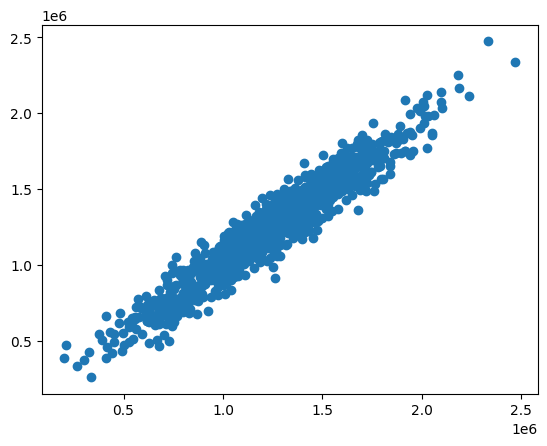

In [30]:
plt.scatter(y_test,predictions)

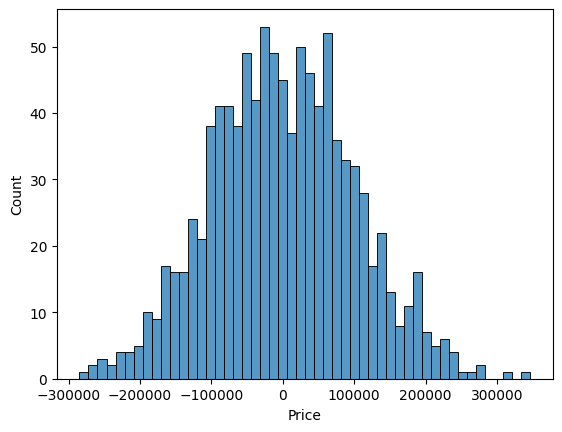

In [31]:
sns.histplot((y_test-predictions),bins=50);

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 80879.0972348982
MSE: 10089009300.894518
RMSE: 100444.06055558745
